In [1]:
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np

/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]
# tickers = ["MSFT", "QQQ"]

start_date = datetime(2018, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)
# tickData = tickData.dropna()

print(tickData.shape)
# Most Recent Data
tickData.head(50)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(2205, 2)


,BTC-USD,ETH-USD
Date,,
2018-01-01,13657.200195,772.640991
2018-01-02,14982.099609,884.443970
2018-01-03,15201.000000,962.719971
2018-01-04,15599.200195,980.921997
2018-01-05,17429.500000,997.719971
2018-01-06,17527.000000,1041.680054
2018-01-07,16477.599609,1153.170044
2018-01-08,15170.099609,1148.530029
2018-01-09,14595.400391,1299.739990


In [3]:
import warnings
warnings.filterwarnings('ignore')
# y_series, x_series, start_full, end_full, start_train, end_train
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2020-01-05','2018-01-05','2019-01-04')
# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')

#12 months calculate, 6 months sample by sample, we can move this window to simulate strategy?
# or rebalance every day
pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-07-05','2018-01-05','2019-01-05', 365)

# pair = PairStrategy(tickData['MSFT'],tickData['QQQ'],'2020-01-05','2022-01-04','2020-01-05','2022-01-04')


print(pair)
# print(pair.is_valid_pair())

# pair.OU_PARAMS_DICT['full_resid'].plot()

# pair.y_full.plot()

# print(pair.OU_PARAMS_DICT)

val = pair.run_strategy()

res = pair.results
res.head(100)

# res[['strategy','position']].plot()

# pair.plot_pair(pair.results)
# pair.plot_data()

# print(val)
# # pair.OU_PARAMS_DICT['full_z_resid'].plot()
# # pair.OU_PARAMS_DICT['full_resid'].plot()
# # print(pair.AFF_DICT)
# # print(pair.OLS_STATS_DICT)





# res[['upper_cross', 'lower_cross', 'mean_cross','full_resid','mu', 'upper_bound', 'lower_bound']].plot()
# res[['mean_cross']].plot()
# plt.title("Title of the Plot")
# plt.xlabel("X-axis Label")
# plt.ylabel("Y-axis Label")
# plt.legend()
# plt.show()






Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2019-01-05), Full start (2018-01-05) End full (2019-07-05)]
Pair [ETH-USD, BTC-USD]
	Window: [Train start (2018-01-05) End train (2019-01-05), Full start (2018-01-05) End full (2019-07-05)]
	p-value: 6.428731506607349e-09
	Pair eligible: True
0.055576258449485605
-0.06022823410286254
ab perf 0.4820110752142701


,price_y,price_x,full_resid,b,return_y,return_x,return,mu,dist,lower_bound,upper_bound,position,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,,,
2018-01-05,1.0000,1.0000,0.3573,0.4113,0.0000,0.0000,0.0000,-0.002326,0.359626,-0.060228,0.055576,-1.0,0.0000,1.000000,1.000000
2018-01-06,1.0056,1.0441,0.3448,0.4113,0.0056,0.0431,-0.0122,-0.002326,0.347126,-0.060228,0.055576,-1.0,0.0122,0.987874,1.012275
2018-01-07,0.9454,1.1558,0.2386,0.4113,-0.0617,0.1017,-0.1036,-0.002326,0.240926,-0.060228,0.055576,-1.0,0.1036,0.890653,1.122771
2018-01-08,0.8704,1.1512,0.1655,0.4113,-0.0827,-0.0040,-0.0810,-0.002326,0.167826,-0.060228,0.055576,-1.0,0.0810,0.821355,1.217501
2018-01-09,0.8374,1.3027,0.0702,0.4113,-0.0386,0.1237,-0.0895,-0.002326,0.072526,-0.060228,0.055576,-1.0,0.0895,0.751037,1.331492
2018-01-10,0.8591,1.2587,0.1100,0.4113,0.0256,-0.0344,0.0397,-0.002326,0.112326,-0.060228,0.055576,-1.0,-0.0397,0.781453,1.279667
2018-01-11,0.7691,1.1576,0.0616,0.4113,-0.1106,-0.0837,-0.0761,-0.002326,0.063926,-0.060228,0.055576,-1.0,0.0761,0.724191,1.380851
2018-01-12,0.8021,1.2761,0.0458,0.4113,0.0420,0.0975,0.0019,-0.002326,0.048126,-0.060228,0.055576,-1.0,-0.0019,0.725568,1.378230
2018-01-13,0.8239,1.3996,0.0168,0.4113,0.0268,0.0924,-0.0112,-0.002326,0.019126,-0.060228,0.055576,-1.0,0.0112,0.717487,1.393753


(            Residuals      mu_e     upper     lower
 Date                                               
 2018-01-05   0.357283 -0.002326  0.055576 -0.060228
 2018-01-06   0.344754 -0.002326  0.055576 -0.060228
 2018-01-07   0.238583 -0.002326  0.055576 -0.060228
 2018-01-08   0.165480 -0.002326  0.055576 -0.060228
 2018-01-09   0.070169 -0.002326  0.055576 -0.060228
 ...               ...       ...       ...       ...
 2019-07-01   0.254743 -0.002326  0.055576 -0.060228
 2019-07-02   0.268125 -0.002326  0.055576 -0.060228
 2019-07-03   0.329913 -0.002326  0.055576 -0.060228
 2019-07-04   0.294780 -0.002326  0.055576 -0.060228
 2019-07-05   0.279751 -0.002326  0.055576 -0.060228
 
 [547 rows x 4 columns],
 {'mu_e': -0.002325987826688472,
  'upper': 0.055576258449485605,
  'lower': -0.06022823410286254})

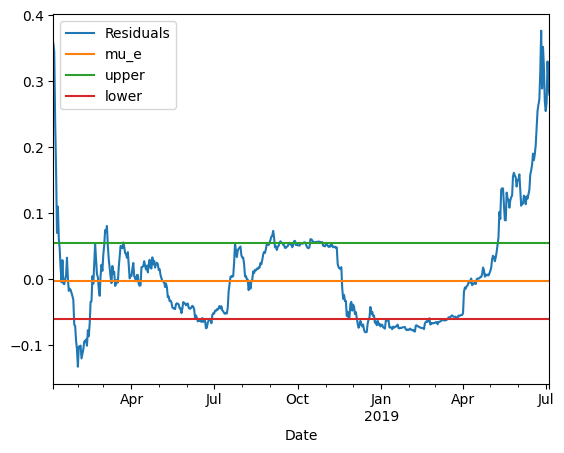

In [4]:
pair.plotRangeBoundFrame(1)

In [5]:
print(dict1)
print(dict2)
print()
print(pair.oU_res_train)

print('Linear Regresion TRAINING', pair.name)
print(pair.linear_regression_training_df)
ou = pair.ou
print('sigma eq', ou.sigmaeq)
print('sigma ou', ou.sigmaOU)
print('half life', ou.half_life)
print('tau', ou.tau)



NameError: name 'dict1' is not defined

In [11]:
from src.cointegration.ou_fit import OUFit
#Start residuals 2018-01-05 00:00:00) End train 2019-01-04 00:00:00)
dict1 = dictionary_ou_params(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2020-01-05')
dict2 = dictionary_ou_params_mine(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2020-01-05')

ou_fit = OUFit(pair.train_residuals, 1/365)
ou_fit.fit()
print(ou_fit.sigmaOU)
print(ou_fit.sigmaeq)
print(ou_fit.theta)
print(ou_fit.mu)
print()
print()

ou_fit.fit2()
print(ou_fit.sigmaOU)
print(ou_fit.sigmaeq)
print(ou_fit.theta)
print(ou_fit.mu)

#same
# print(dict1)
# print(dict2)
# dict1['spread'].plot()
# dict2['spread'].plot()

start 2018-01-05 00:00:00  upto  2019-01-04 00:00:00
final 2018-01-05 00:00:00  upto  2020-01-05 00:00:00
start 2018-01-05 00:00:00  upto  2019-01-04 00:00:00
final 2018-01-05 00:00:00  upto  2020-01-05 00:00:00
0.5802331639902589
0.07370111815141919
30.990383207110334
-0.002929100850733708


0.5802331639902589
0.07370111815141919
30.965862595943978
-0.002929100850733708


In [ ]:
x_train, y_train, x_test, y_test = get_pivoted_test_train_data(tickData['ETH-USD'],tickData['BTC-USD'], end_look_back_date='2019-01-01', lookback_period=365)

x_train

Date
2018-01-01    13657.200195
2018-01-02    14982.099609
2018-01-03    15201.000000
2018-01-04    15599.200195
2018-01-05    17429.500000
                  ...     
2018-12-27     3654.833496
2018-12-28     3923.918701
2018-12-29     3820.408691
2018-12-30     3865.952637
2018-12-31     3742.700439
Name: BTC-USD, Length: 365, dtype: float64

In [ ]:
EG_2

,Estimate,SD of Estimate,t-Statistic,p-value
ΔBTC-USD,1.350075,0.057245,23.58404,3.667522e-75
"(Lag 1, Residuals)",0.136039,0.021057,6.46064,3.366042e-10
